In [44]:
!pip install fitter

  Preparing metadata (setup.py) ... done
  Created wheel for fitter: filename=fitter-1.5.1-py3-none-any.whl size=25596 sha256=740bd4934a43b01a9aed51dd741fbf7d71a5c0988dc42582c4a8175a596c9fa5
  Stored in directory: /home/dh2409/.cache/pip/wheels/fe/60/a8/447c66eae887b085b3e112358a5fa837104b6cd0d9de41ca71
Successfully built fitter


In [10]:
import pandas as pd
import numpy as np

In [46]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from fitter import Fitter
import seaborn as sns

In [94]:
bid = pd.read_csv('BID.csv')

In [95]:
bid.head()

,Attributes,high,low,open,close,adjust,volume
0,Symbols,BID,BID,BID,BID,BID,BID
1,date,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-24,19.5,18.5,19.0,18.8,11.11,8417060
3,2014-01-27,18.8,18.1,18.7,18.4,10.87,3240910
4,2014-02-06,18.3,17.6,18.2,17.6,10.4,959590


In [99]:
def clean_data(bid):
    bid.drop([0,1],inplace=True)
    bid.reset_index(inplace=True,drop=True)
    bid.rename(columns={'Attributes':'date'}, inplace=True)
    bid['date'] = pd.to_datetime(bid['date'], format='%Y-%m-%d')
    bid['high'] = bid['high'].astype(float)
    bid['low'] = bid['low'].astype(float)
    bid['open'] = bid['open'].astype(float)
    bid['close'] = bid['close'].astype(float)
    print("From:",bid.head(1)['date'])
    print("To:",bid.tail(1)['date'])
    print("Total number of date", len(bid))

In [129]:
def plot(df, from_date=None, cat='candle_stick'):
    if from_date is None:
        fig = go.Figure(data=[go.Candlestick(x=df['date'],
                        open=df['open'],
                        high=df['high'],
                        low=df['low'],
                        close=df['close'])])
        fig.show()
    else:
        from_date = pd.to_datetime(from_date,format="%Y-%m-%d")
        temp_df = df.loc[df['date'] >= from_date].reset_index()
        print(len(temp_df))
        if cat == 'candle_stick':
            fig = go.Figure(data=[go.Candlestick(x=temp_df['date'],
                            open=temp_df['open'],
                            high=temp_df['high'],
                            low=temp_df['low'],
                            close=temp_df['close'])])
            fig.show()
        elif cat == 'hist':
            sns.displot(data=temp_df, x="close", kind="hist")
            plt.show()
            f = Fitter(temp_df['close'].values,
            distributions=['gamma',
#                           'lognorm',
                          "beta",
                          "burr",
                          "norm"])
            f.fit()
            print(f.summary())

In [143]:
def normalize(df, from_date, file_name):
    from_date = pd.to_datetime(from_date,format="%Y-%m-%d")
    temp_df = df.loc[df['date'] >= from_date].reset_index()
    temp_df.to_csv(file_name, index=False)

# BID

In [130]:
clean_data(bid=bid)

From: 0   2014-02-24
Name: date, dtype: datetime64[ns]
To: 2171   2022-11-01
Name: date, dtype: datetime64[ns]
Total number of date 2172


In [131]:
plot(bid,"2015-01-01")

1955


1955


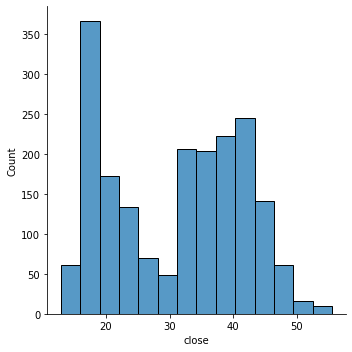

Fitting 4 distributions: 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]


       sumsquare_error         aic           bic  kl_div  ks_statistic  \
burr          0.029715  840.061236 -21658.954920     inf      0.108796   
beta          0.030294  789.056367 -21621.234401     inf      0.107998   
norm          0.037807  804.812311 -21203.267416     inf      0.118639   
gamma         0.037990  806.219664 -21186.245687     inf      0.118307   

          ks_pvalue  
burr   1.314472e-20  
beta   2.596712e-20  
norm   1.963479e-24  
gamma  2.675170e-24  


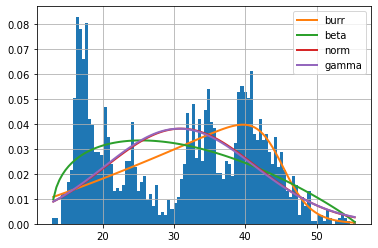

In [132]:
plot(bid,"2015-01-01",'hist')

In [144]:
normalize(bid,"2015-01-01","BID_2015.csv")

# BVH

In [133]:
bvh = pd.read_csv('BVH.csv')

In [134]:
clean_data(bvh)

From: 0   2009-06-25
Name: date, dtype: datetime64[ns]
To: 3334   2022-11-01
Name: date, dtype: datetime64[ns]
Total number of date 3335


In [135]:
plot(bvh, "2015-01-01")

1955


1955


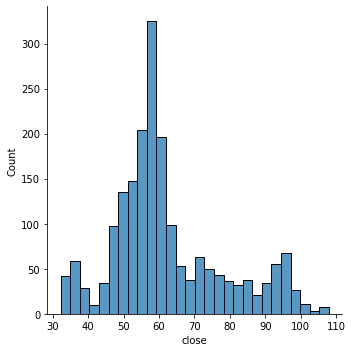

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00,  5.45it/s]


       sumsquare_error         aic           bic  kl_div  ks_statistic  \
burr          0.009415  967.549915 -23905.901365     inf      0.088324   
gamma         0.011295  947.839914 -23557.592790     inf      0.113098   
beta          0.011316  948.950914 -23546.353358     inf      0.112307   
norm          0.013559  957.368853 -23207.982861     inf      0.163065   

          ks_pvalue  
burr   1.015859e-13  
gamma  3.074518e-22  
beta   6.202711e-22  
norm   6.847122e-46  


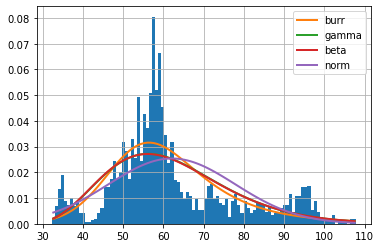

In [136]:
plot(bvh, "2015-01-01", 'hist')

In [145]:
normalize(bvh,"2015-01-01","BVH_2015.csv")

# CTG

In [137]:
ctg = pd.read_csv('CTG.csv')
clean_data(ctg)
plot(ctg, "2015-01-01")

From: 0   2009-07-16
Name: date, dtype: datetime64[ns]
To: 3319   2022-11-01
Name: date, dtype: datetime64[ns]
Total number of date 3320
1955


1955


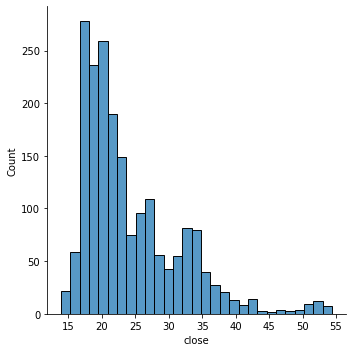

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00,  4.47it/s]


       sumsquare_error          aic           bic  kl_div  ks_statistic  \
burr          0.017141   926.118855 -22734.488752     inf      0.061864   
beta          0.020279   946.645328 -22405.897658     inf      0.078943   
gamma         0.020302   920.788701 -22411.224883     inf      0.077476   
norm          0.046888  1020.169805 -20782.408093     inf      0.146601   

          ks_pvalue  
burr   6.018291e-07  
beta   4.808859e-11  
gamma  1.183540e-10  
norm   3.898194e-37  


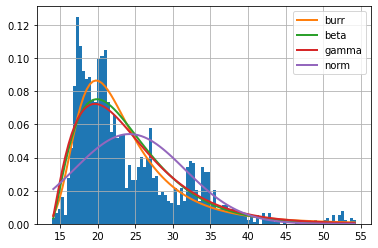

In [138]:
plot(ctg, "2015-01-01", 'hist')

In [146]:
normalize(ctg,"2015-01-01","CTG_2015.csv")

# ACB

In [139]:
acb = pd.read_csv('ACB.csv')
clean_data(acb)
plot(acb, "2015-01-01")

From: 0   2006-11-21
Name: date, dtype: datetime64[ns]
To: 3966   2022-11-01
Name: date, dtype: datetime64[ns]
Total number of date 3967
1952


1952


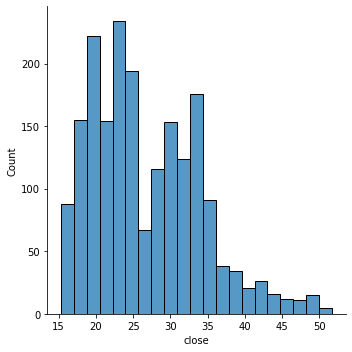

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00,  5.33it/s]


       sumsquare_error         aic           bic  kl_div  ks_statistic  \
beta          0.028454  827.210022 -21707.285841     inf      0.051212   
gamma         0.030240  822.999995 -21596.063893     inf      0.078467   
burr          0.034203  831.564595 -21348.093732     inf      0.095407   
norm          0.038017  878.521579 -21156.895759     inf      0.097428   

          ks_pvalue  
beta   6.876559e-05  
gamma  6.697068e-11  
burr   6.465334e-16  
norm   1.401353e-16  


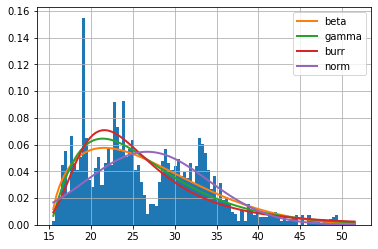

In [140]:
plot(acb, "2015-01-01", 'hist')

In [147]:
normalize(acb,"2015-01-01","ACB_2015.csv")

# FPT

In [141]:
fpt = pd.read_csv('FPT.csv') 
clean_data(fpt)
plot(fpt, "2015-01-01")

From: 0   2006-12-13
Name: date, dtype: datetime64[ns]
To: 3958   2022-11-01
Name: date, dtype: datetime64[ns]
Total number of date 3959
1954


1954


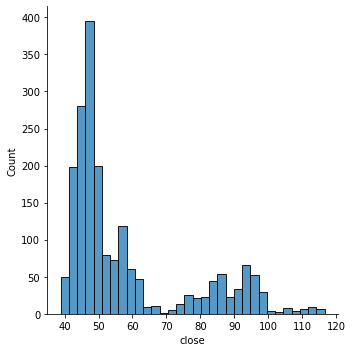

Fitting 4 distributions: 100%|██████████| 4/4 [00:00<00:00,  5.62it/s]


       sumsquare_error          aic           bic  kl_div  ks_statistic  \
burr          0.009538  1067.439481 -23867.221338     inf      0.110941   
gamma         0.017197  1011.155165 -22723.095564     inf      0.160750   
norm          0.032089  1034.435896 -21511.828939     inf      0.229708   
beta          0.034069   910.310070 -21379.658128     inf      0.278910   

           ks_pvalue  
burr    2.110207e-21  
gamma   1.400749e-44  
norm    4.054646e-91  
beta   6.647866e-135  


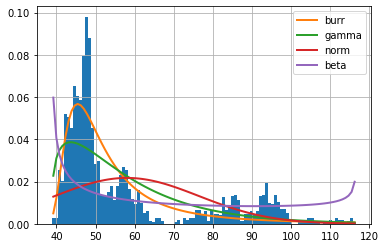

In [142]:
plot(fpt, "2015-01-01", 'hist')

In [148]:
normalize(fpt,"2015-01-01","FPT_2015.csv")

In [38]:
import scipy.stats as st
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min", "pareto", "genextreme"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [40]:
get_best_distribution(bid['close'])

p value for norm = 4.0411155448872515e-36
p value for exponweib = 5.9479572163219155e-27
p value for weibull_max = 0.0
p value for weibull_min = 0.0
p value for pareto = 2.4270466481456643e-78
p value for genextreme = 5.700312611367273e-36
Best fitting distribution: exponweib
Best p value: 5.9479572163219155e-27
Parameters for the best fit: (0.343941100884656, 3.9376205748610005, 9.661873246190567, 31.745707163351042)


('exponweib',
 5.9479572163219155e-27,
 (0.343941100884656,
  3.9376205748610005,
  9.661873246190567,
  31.745707163351042))